In [9]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

In [10]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]

In [11]:
X_train.shape

(50000, 28, 28)

In [12]:
# 3. Reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [13]:
# 4. One hot encoding label (Y)
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Dữ liệu y ban đầu ', y_train[0])
print('Dữ liệu y sau one-hot encoding ',Y_train[0])

Dữ liệu y ban đầu  5
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [14]:
model = Sequential([
    Conv2D(32,(3,3), activation='sigmoid', input_shape=(28,28,1)),
    Conv2D(32, (3, 3), activation='sigmoid'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='softmax'),
])

In [15]:
model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [16]:
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
            batch_size=256, epochs=10, verbose=1)

Epoch 1/10
196/196 [==============================] - 40s 202ms/step - loss: 1.1343 - accuracy: 0.7150 - val_loss: 0.3902 - val_accuracy: 0.9241
Epoch 2/10
196/196 [==============================] - 41s 211ms/step - loss: 0.2840 - accuracy: 0.9358 - val_loss: 0.1701 - val_accuracy: 0.9633
Epoch 3/10
196/196 [==============================] - 40s 202ms/step - loss: 0.1530 - accuracy: 0.9630 - val_loss: 0.1102 - val_accuracy: 0.9742
Epoch 4/10
196/196 [==============================] - 34s 171ms/step - loss: 0.1047 - accuracy: 0.9737 - val_loss: 0.0855 - val_accuracy: 0.9800
Epoch 5/10
196/196 [==============================] - 33s 167ms/step - loss: 0.0805 - accuracy: 0.9797 - val_loss: 0.0727 - val_accuracy: 0.9824
Epoch 6/10
196/196 [==============================] - 35s 181ms/step - loss: 0.0647 - accuracy: 0.9839 - val_loss: 0.0640 - val_accuracy: 0.9839
Epoch 7/10
196/196 [==============================] - 39s 198ms/step - loss: 0.0524 - accuracy: 0.9869 - val_loss: 0.0574 - val_ac

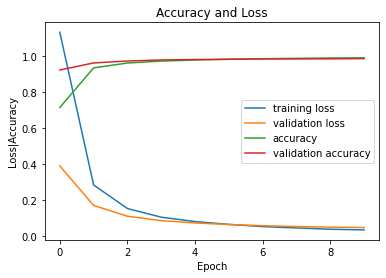

In [17]:
# 8. Vẽ đồ thị loss, accuracy của training set và validation set
numOfEpoch = 10
fig = plt.figure()
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

[0.043027300387620926, 0.9865999817848206]
1/1 [==============================] - 0s 102ms/step
Giá trị dự đoán:  7


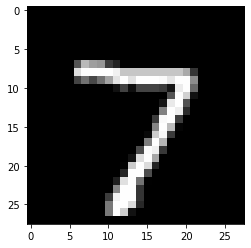

In [18]:
# 9. Đánh giá model với dữ liệu test set
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)
# 10. Dự đoán ảnh
plt.imshow(X_test[0].reshape(28,28), cmap='gray')
y_predict = model.predict(X_test[0].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))